In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [3]:
##---------------DATOS DE ENTRENAMIENTO -------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosPrueba4.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_tr']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
np.count_nonzero(pd.isnull(df) == True)

df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','Label']
df.sample(8)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Label
159,0.867796,1.930266,0.014109,0.020760,3.168328,11.058693,11.217533,0.000101,2.107543,409.59,357.599434,228.0,8.8956,2.330856,4.173819,1476.0,222.0,542.551887,0.0
597,0.000180,0.000235,0.000130,0.000053,2.507660,5.472269,0.000980,0.000000,0.000295,86.32,35.630789,62.0,0.0000,0.760196,-1.436164,138.0,62.0,93.316665,1.0
986,0.007632,0.019920,0.000432,0.000414,3.570368,15.116600,0.131655,0.000113,0.021238,1117.35,532.200376,1476.0,0.0000,-0.881341,-1.130694,1476.0,222.0,1236.477210,0.0
546,0.002741,0.005624,0.000276,0.000039,2.111568,2.778239,0.019964,0.000221,0.006231,303.30,249.094339,249.0,1.4826,4.635820,20.658084,1614.0,248.0,391.686609,0.0
1043,0.181221,0.322347,0.025077,0.036960,3.450466,15.551587,2.118593,0.000130,0.368388,455.21,131.911150,481.0,13.3434,3.815823,28.478740,1432.0,222.0,473.753828,0.0
722,0.019112,0.038690,0.000568,0.000686,2.660922,8.340861,0.230103,0.000103,0.042979,1029.48,572.738177,1072.0,895.4904,-0.159480,-1.596693,1676.0,222.0,1176.680840,0.0
407,0.000605,0.001019,0.000156,0.000113,1.620600,0.689342,0.002920,0.000004,0.001181,84.04,34.659650,62.0,0.0000,0.911746,-1.180222,138.0,62.0,90.840520,1.0
899,0.000237,0.001012,0.000099,0.000141,9.273482,87.444867,0.010108,0.000003,0.001035,96.20,38.000000,62.0,0.0000,0.198000,-1.980300,138.0,62.0,103.363436,1.0


In [4]:
YEntrenamiento = df['Label']
XEntrenamiento = scaler.fit_transform(df.drop(['Label'],axis=1))

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [6]:
def output_activation_MPC():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPClassifier()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom, yrandom )
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [7]:
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar        
    """
    #Validamos el modelo
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(activation='tanh', max_iter=400,  hidden_layer_sizes = hidden_layer_sizes)
                # entrenar el MLP
                mlp.fit(X = Xtrain, y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                Error[j] = accuracy_score(Ytest,Yest)
                
        
            print('error para configuracion de params = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba(media)'] = np.mean(Error)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Error)
            idx+=1
    return (resultados)

In [8]:
resultados_mlpc = experimetar_mlpc(XEntrenamiento,YEntrenamiento, [1,2], [12,16,20,24])

error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193


In [9]:
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,error de prueba(media),intervalo de confianza
0,1.0,12.0,0.25,0.433013
1,1.0,16.0,0.25,0.433013
2,1.0,20.0,0.25,0.433013
3,1.0,24.0,0.25,0.433013
4,2.0,12.0,0.25,0.433013
5,2.0,16.0,0.25,0.433013
6,2.0,20.0,0.25,0.433013
7,2.0,24.0,0.25,0.433013


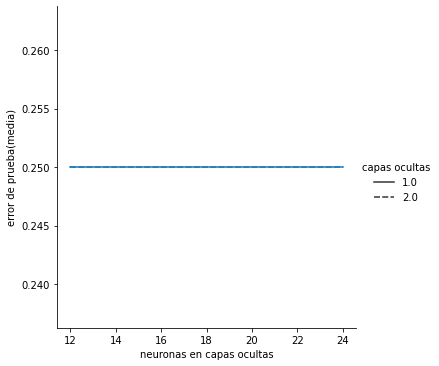

In [10]:
# ver los resultados
import seaborn as sns
sns.relplot(data = resultados_mlpc,  x='neuronas en capas ocultas', y = 'error de prueba(media)', style= 'capas ocultas', kind = 'line')